## Models Testing and comparaisons

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import _tree
from sklearn.metrics import confusion_matrix

from FCM_SS_2 import FCM_SS_2

import matplotlib.pyplot as plt
import itertools
import copy
import numpy as np

DATASETS_PATHS = ['datasets/melanomaTest.dat.csv', 'datasets/seeds_dataset.csv'] # http://cibcb.org/data/

%matplotlib inline

/home/arthur/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Loading datasets

In [2]:
def loadDataset(filename):
    dataset = np.genfromtxt(filename, delimiter=';')
    
    # save all the labels to calculate the performance of our algorithm
    true_labels = copy.copy(dataset[:, -1])
    labels_names = np.unique(true_labels)
    
    return dataset, true_labels, labels_names

DATASETS = []
for path in DATASETS_PATHS:
    DATASETS.append(loadDataset(path))


## Remove some labels

In [3]:
def removeLabels(dataset, labels_name, percentage):  
    result = copy.copy(dataset)
    # remove percentage of each different labels for test purpose       
    for label in labels_name:
        subArrayIdx = np.where(result[:,-1] == label)[0]
        idx = np.random.choice(subArrayIdx, int(len(subArrayIdx)*percentage/100), replace=False)
        for i in idx:
            result[i][-1] = 0
            

    return result

#for dataset in DATASETS:
#    dataset[0] = removeLabels(dataset[0], dataset[2], 50)
#dataset = removeLabels(DATASETS[0][0], DATASETS[1][2], 80)
dataset = DATASETS[0][0]

## Perform Tests

In [4]:
fcm = FCM_SS_2() 
fcm.setParams(fuzzy_param=2, membership_threshold=0.95)
new_data, labels, centers, mb = fcm.clusterize(dataset, DATASETS[0][2])
print(new_data[:, -1])

cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [4]
pc_s 0.4692264478749713
xb_s 0.6546795159348675
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0, 6]
pc_s 0.39930543234290744
xb_s 0.7817366353956463
cluster_ok []
center [array([  3.0688165 , 188.98919368, 149.06248863, 124.00772042,
       169.67388316, 131.0771435 , 106.3055924 , 184.32589077,
       145.80447063, 120.01026518,   0.76952843,   0.98435568,
         0.85204188,   1.61518959,  31.58899889,   6.7925256 ,
        39.01040092]), array([  2.39938177, 218.9264973 , 158.02174189, 151.88021464,
       196.07219936, 129.71321295, 120.43398066, 209.60068101,
       148.57327354, 138.38711562,   0.52520454,   0.69661619,
         0.88416959,   2.0921192 ,  93.96929546,  12.39035149,
       131.21851439]), array([  2.72243403, 166.98372582, 112.73249106, 118.94181298,
       150.91421525,  95.14373366, 101.07673423, 164.56519875,
       113.36775436, 118.31263451,   0.72434821,   0.99045118,
         0.78963956,   1.

### Confusion Matrix and scores

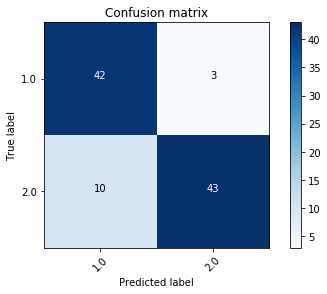

In [5]:

conf_mat = confusion_matrix(labels, [row[-1] for row in new_data])
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(DATASETS[0][2]))
    plt.xticks(tick_marks, DATASETS[0][2], rotation=45)
    plt.yticks(tick_marks, DATASETS[0][2])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
plot_confusion_matrix(conf_mat)

In [6]:
print("Accuracy:", accuracy_score(labels, [row[-1] for row in new_data]))
precision = (conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) + conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]))/2
print("Precision: ", precision)
recall = (conf_mat[0][0]/(conf_mat[0][0] + conf_mat[0][1]) + conf_mat[1][1]/(conf_mat[1][1] + conf_mat[1][0]))/2
print("Recall: ", recall)
f1score = 2*(precision*recall)/(precision+recall)
print("F1-Score: ", f1score)

Accuracy: 0.8673469387755102
Precision:  0.8712374581939799
Recall:  0.8723270440251573
F1-Score:  0.8717819106583602


199
98
cluster_ok [2]
pc_s 0.726560939970059
xb_s 0.15165155858881776
cluster_ok [1]
pc_s 0.6293608127538389
xb_s 0.21581327143076195
cluster_ok []
cluster_ok [2]
pc_s 0.6116049356185081
xb_s 0.21434616830936426
cluster_ok []
cluster_ok [2]
pc_s 0.6057077685246377
xb_s 0.18394182963209482
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [1, 5]
pc_s 0.5226614199673132
xb_s 0.3689467055837719
cluster_ok [1]
pc_s 0.5399864687848656
xb_s 0.2683952601050378
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [2]
pc_s 0.6169512799440059
xb_s 0.2204928014510296
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [3, 4]
pc_s 0.5314726718178476
xb_s 0.36773127637064246
cluster_ok []
center [array([18.75041173, 16.30982509,  0.88503152,  6.21548203,  3.72516862,
        3.50057216,  6.06817773]), array([11.79572215, 13.22875828,  0.84613323,  5.23214294,  2.83289255,
        5.07408774,  5.12180601]), array([14.92821164, 14.59229713,  0.88056664,  5.61045565,  3

cluster_ok [0, 1, 2]
pc_s 0.574185360810212
xb_s 0.09921256931143169
cluster_ok [0, 1]
pc_s 0.7046058524258996
xb_s 0.0742975098269197
cluster_ok [0, 1]
pc_s 0.5
xb_s 0.0
center [array([11.97113269, 13.30043519,  0.84910075,  5.24806551,  2.86112956,
        4.67304307,  5.11486106]), array([18.75595109, 16.30794914,  0.88547761,  6.215472  ,  3.72766104,
        3.42698617,  6.06773843]), array([14.62363146, 14.45129814,  0.87863294,  5.56626295,  3.27299802,
        2.75304701,  5.18652992]), array([18.00170381, 15.90872644,  0.89308381,  6.03233554,  3.69674568,
        3.17560776,  5.90462561]), array([14.31905135, 14.27332741,  0.88249753,  5.50563784,  3.25520633,
        2.97330741,  5.15932094]), array([15.38  , 14.9   ,  0.8706,  5.884 ,  3.268 ,  4.462 ,  5.795 ]), array([15.38  , 14.9   ,  0.8706,  5.884 ,  3.268 ,  4.462 ,  5.795 ])]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

        4.028     ,  5.54733333])]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 8, 8, 8]
[[17.08   15.38    0.9079 ...  2.956   5.484   1.    ]
 [17.63   15.98    0.8673 ...  4.076   6.06    2.    ]
 [16.84   15.67    0.8623 ...  4.675   5.877   2.    ]
 ...
 [16.17   15.38    0.8588 ...  4.286   5.703   2.    ]
 [15.99   14.89    0.9064 ...  3.336   5.144   2.    ]
 [15.38   14.9     0.8706 ...  4.462   5.795   2.    ]]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 

/home/arthur/Documents/LFA/LFA_Labs/LFA Project/FCM_SS_2.py:120: RuntimeWarning: invalid value encountered in sqrt
  return sum(np.sqrt(np.linalg.det(cov)) for cov in covariances)


cluster_ok []
cluster_ok [0]
pc_s 0.96369194930577
xb_s 0.6071364194907254
cluster_ok []
cluster_ok []
cluster_ok [1]
pc_s 0.8214265488108932
xb_s 0.12965791726437492
cluster_ok []
cluster_ok [0]
pc_s 0.8214282384203371
xb_s 0.054985377304107234
cluster_ok []
cluster_ok []
center [array([18.71188785, 16.2962262 ,  0.88472122,  6.20848563,  3.72050149,
        3.61561782,  6.06251894]), array([11.91012782, 13.26821357,  0.84900976,  5.23804252,  2.85888931,
        5.24620074,  5.11888651]), array([14.90648689, 14.57938499,  0.8808766 ,  5.60606852,  3.31413408,
        2.0001933 ,  5.18270757]), array([14.20797404, 14.26503442,  0.87746384,  5.53167788,  3.21271182,
        3.52287255,  5.0962628 ]), array([13.03416967, 13.65747435,  0.87819891,  5.28787672,  3.0732458 ,
        1.94096396,  4.87839495]), array([15.78      , 14.91      ,  0.8923    ,  5.674     ,  3.434     ,
        5.59299999,  5.13600001]), array([16.1993555 , 15.26806203,  0.87358854,  5.82447138,  3.46449508,
    

cluster_ok [0]
pc_s 0.4169171886699229
xb_s 0.1804019863376148
cluster_ok []
cluster_ok [1]
pc_s 0.4324495197557796
xb_s 0.11915257526752336
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [4]
pc_s 0.3472597278412149
xb_s 0.1793139786310948
cluster_ok [0]
pc_s 0.31253047408602547
xb_s 0.07759807481673839
cluster_ok []
cluster_ok []
cluster_ok [3]
pc_s 0.39492784066238684
xb_s 0.06308814676432546
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.3169907221938032
xb_s 0.10579834326163813
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [1, 5]
pc_s 0.31435686344947883
xb_s 8.484642244604814e+25
center [array([18.74206324, 16.2982956 ,  0.88583547,  6.21230262,  3.72755752,
        3.38750386,  6.06410806]), array([11.83562185, 13.25137017,  0.84596376,  5.23923167,  2.83504331,
        5.02496098,  5.13231555]), array([15.0661961 , 14.67819659,  0.87825405,  5.65362207,  3.31924206,
        2.11344194,  5.25308542]), array([13.82942933, 14.07391749,  0

cluster_ok [0]
pc_s 0.37693008987388243
xb_s 0.05540456847656816
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.2547927245162066
xb_s 0.010610488750816598
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [3]
pc_s 0.22117497150021898
xb_s 0.019239723455980757
cluster_ok []
cluster_ok []
cluster_ok [3]
pc_s 0.2205264741543955
xb_s 2.4701628719661995e+24
cluster_ok []
cluster_ok [0]
pc_s 0.27127288775488323
xb_s 0.014093049790181379
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.22187453968132673
xb_s 0.33541217022988046
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.24059979649682797
xb_s 0.3752375738812929
cluster_ok []
cluster_ok []
cluster_ok []
center [array([18.69648886, 16.27253703,  0.88638645,  6.20315846,  3.72411536,
        3.3513454 ,  6.05430242]), array([11.94177899, 13.30324195,  0.84680163,  5.25301904,  2.8501225 ,
        4.94423494,  5.13656119]), array([14.52352789, 14.399

cluster_ok []
cluster_ok [2]
pc_s 0.985460498109993
xb_s 0.35303341741910693
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [4]
pc_s 0.9942331194869514
xb_s 1.0929437899139598
cluster_ok []
cluster_ok [0, 5]
pc_s 0.9717915299887535
xb_s 1.8470169400651837e+19
cluster_ok []
cluster_ok [0]
pc_s 0.9967432032206119
xb_s 0.26605618992697366
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
center [array([18.71204136, 16.29629222,  0.88472152,  6.20851213,  3.72051718,
        3.61559321,  6.06254278]), array([11.91009174, 13.26820167,  0.84900869,  5.23804406,  2.85888017,
        5.24629538,  5.11889764]), array([15.28925319, 14.79952997,  0.87701749,  5.69271199,  3.3393841 ,
        3.80640594,  5.40775777]), array([14.82933378, 14.5294601 ,  0.88227759,  5.58311768,  3.31163782,
        1.89874273,  5.13592781]), array([14.39677143, 14.34669456,  0.87903873,  5.55265092,  3.24391695,
        3.52932168,  5.09744538]), array([12.44500289, 13.51999231,  0.85540113,  5.21049854

cluster_ok [0]
pc_s 0.574014654899086
xb_s 0.0998179345484748
cluster_ok []
cluster_ok [1]
pc_s 0.49029346298166393
xb_s 0.14128202107156715
cluster_ok []
cluster_ok [1]
pc_s 0.4644547871002514
xb_s 0.16878510426157362
cluster_ok []
cluster_ok []
cluster_ok [3]
pc_s 0.4320659438108323
xb_s 0.1121094112870845
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [1, 4]
pc_s 0.37806165485107074
xb_s 0.5409253532327878
cluster_ok []
cluster_ok [2]
pc_s 0.3482919633309724
xb_s 0.2427354303796578
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [4]
pc_s 0.3226778695415256
xb_s 5.563258714829799e+26
cluster_ok [1]
pc_s 0.48807467570398433
xb_s 0.1841439880622931
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
center [array([18.75672875, 16.30816309,  0.88549339,  6.21553182,  3.72777553,
        3.42246803,  6.06778908]), array([11.78992147, 13.22967686,  0.84557356,  5.23330628,  2.82873257,
        5.02947622,  5.12650591]), array([14.82373002, 14.55043898,  0.87935202,  5.60002

cluster_ok []
cluster_ok [0, 2]
pc_s 0.2258417509142963
xb_s 0.04662183302444888
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0, 1]
pc_s 0.25142113356688256
xb_s 0.5223740264505189
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [2]
pc_s 0.31767914444343726
xb_s 0.04410749743442522
cluster_ok []
cluster_ok [0]
pc_s 0.35279721462871294
xb_s 0.01458098940495071
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.33937697742429435
xb_s 0.03644802126589544
cluster_ok []
cluster_ok []
cluster_ok []
center [array([18.72566204, 16.28781101,  0.88616452,  6.20880633,  3.72678689,
        3.36052661,  6.06014226]), array([11.85550467, 13.26281695,  0.84592148,  5.24298887,  2.83651963,
        4.95195621,  5.13311899]), array([14.06359952, 14.1757896 ,  0.87901948,  5.48633121,  3.20836602,
        2.73500932,  5.06245955]), array([15.07818648, 14.60535097,  0.88812738,  5.60601421,  3.38381783,
        3.09616104,  5.23761733]), array([15.16862275, 14.725735  ,  0.878

cluster_ok [0]
pc_s 0.3530825098215607
xb_s 0.05841725361219033
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [4]
pc_s 0.23745426497979163
xb_s 0.013623954505265132
cluster_ok [4]
pc_s 0.24302090904123475
xb_s 0.0160540309908684
cluster_ok [4]
pc_s 0.23759823660296953
xb_s 3.7088999696007307e+24
cluster_ok []
cluster_ok []
cluster_ok [2, 3]
pc_s 0.19562218034185505
xb_s 9.595259150983294e+24
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.2264380052738156
xb_s 2.6342719938026558
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.2832608592198751
xb_s 0.2277580011256213
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.28257375523939277
xb_s 0.014732360294199876
cluster_ok []
cluster_ok []
center [array([18.68753182, 16.26629081,  0.88661564,  6.20122281,  3.7237025 ,
        3.3355412 ,  6.05193322]), array([11.91931665, 13.29377208,  0.84644402,  5.25124625,  2.84576607,
        4.92546292,  5.1366148 ]), array([14.28187893, 14.28490216,  0.87869552,  5.50714313,  3.23515159,


cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
center [array([14.09692974, 14.17665718,  0.88144899,  5.46776426,  3.22841199,
        2.55680995,  5.03228723]), array([19.09620318, 16.47595055,  0.88397795,  6.29144784,  3.76593066,
        3.38773397,  6.14465762]), array([12.3779465 , 13.48073339,  0.8556023 ,  5.2816185 ,  2.93967441,
        5.11392183,  5.15553785]), array([11.28002533, 12.95385233,  0.8447684 ,  5.14336638,  2.75760999,
        4.25675315,  5.04540859]), array([12.41052105, 13.47371638,  0.85868878,  5.28048216,  2.94202615,
        3.78078945,  5.06782967]), array([12.35561372, 13.4086812 ,  0.86305744,  5.21346066,  2.97215696,
        1.92560623,  4.92403357]), array([17.62653477, 15.9139299 ,  0.87414319,  6.09634707,  3.56059649,
        3.98955638,  5.96137094]), array([18.84662274, 16.33221506,  0.887846  ,  6.21835054,  3.73368231,
        2.23908982,  6.06730224]), array([11.32827301, 13.0

cluster_ok []
cluster_ok []
cluster_ok []
center [array([14.97155242, 14.67516391,  0.87345888,  5.6834457 ,  3.29046206,
        2.11480483,  5.3190146 ]), array([11.27163016, 13.01429698,  0.83583402,  5.18549883,  2.71849541,
        5.33635729,  5.09660755]), array([14.1012065 , 14.17973261,  0.88133044,  5.52632412,  3.21860691,
        2.74663529,  5.04459294]), array([18.95271149, 16.41684024,  0.88337212,  6.25109475,  3.75424827,
        3.3618706 ,  6.14205984]), array([19.12638551, 16.59812822,  0.87274227,  6.25559513,  3.73791613,
        6.63544795,  6.0507964 ]), array([11.95468862, 13.30540612,  0.84809863,  5.27229456,  2.84879008,
        4.25658673,  5.1374026 ]), array([18.72485739, 16.33021988,  0.882228  ,  6.21706975,  3.69134795,
        2.21193167,  6.08772526]), array([14.22926586, 14.28835632,  0.87520601,  5.52891951,  3.20467815,
        3.12348301,  5.14396928]), array([17.31327261, 15.85901365,  0.86483314,  6.06098933,  3.44495037,
        3.80628707,  5

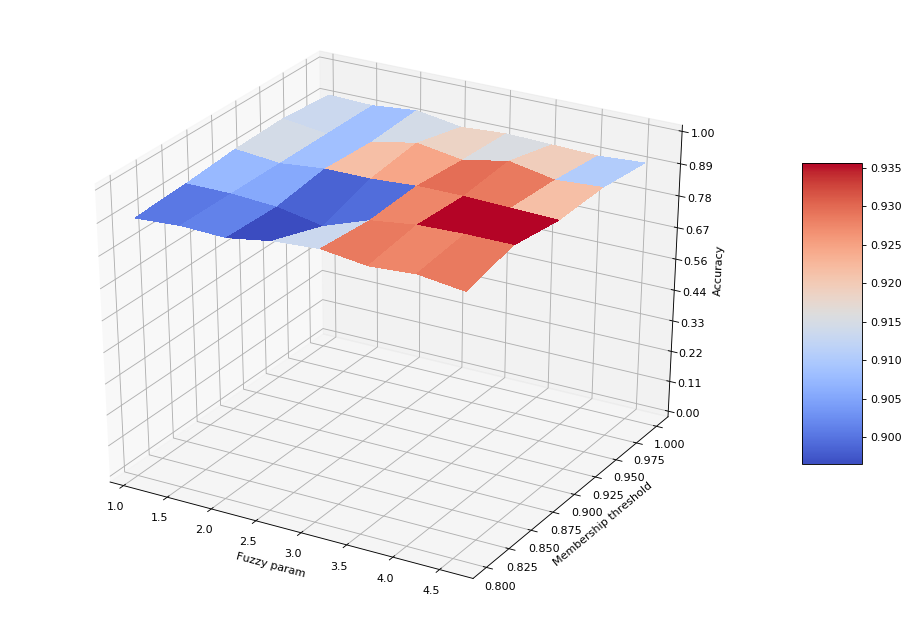

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


dataset = DATASETS[1][0]
true_labels = DATASETS[1][1]
labels_names = DATASETS[1][2]
print(len(true_labels))
print(len(labels))
fuzzy_params = np.arange(1.1,5,0.5)
mb_threshold_values = np.arange(0.8,1.05,0.05)

def computeClustering(fuzzy_param, mb_threshold_value):
    fcm.setParams(fuzzy_param=fuzzy_param, membership_threshold=mb_threshold_value)
    new_data, labels, centers, mb = fcm.clusterize(dataset, labels_names)
    return accuracy_score(labels, [row[-1] for row in new_data])

print(computeClustering(2, 0.95))
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

# Make data.
fuzzy_params, mb_threshold_values = np.meshgrid(fuzzy_params, mb_threshold_values)

accurencies = np.array([computeClustering(x,y) for x,y in zip(np.ravel(fuzzy_params), np.ravel(mb_threshold_values))])
accurencies = accurencies.reshape(mb_threshold_values.shape)

graph = ax.plot_surface(fuzzy_params, mb_threshold_values, accurencies, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('Fuzzy param')
ax.set_ylabel('Membership threshold')
ax.set_zlabel('Accuracy')

# Customize the z axis.
ax.set_zlim(0, 1.00)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(graph, shrink=0.5, aspect=5)

plt.show()

In [ ]:


def computeClustering(percentageOmission):
    dataset = DATASETS[1][0]
    true_labels = DATASETS[1][1]
    labels_names = DATASETS[1][2]
    dataset = removeLabels(dataset, labels_names, percentageOmission) 
    fcm.setParams(fuzzy_param=2, membership_threshold=0.975)
    new_data, labels, centers, mb = fcm.clusterize(dataset, labels_names)
    return accuracy_score(labels,  [row[-1] for row in new_data])

labelOmission = np.arange(0, 100)
accurencies = np.array([computeClustering(x) for x in labelOmission])

fig, axes = plt.subplots()

axes.plot(labelOmission, accurencies, 'r')
axes.set_xlabel('Percentage of Unlabeled Data')
axes.set_ylabel('Accurency')
axes.set_title('Evolution of the FCM accurency depending on the percentage of labelised data');

cluster_ok [0]
pc_s 0.726470474612767
xb_s 0.14990436138055174
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [1]
pc_s 0.5106569838056727
xb_s 0.4061757941493756
cluster_ok []
cluster_ok [0]
pc_s 0.621532827776981
xb_s 0.28826478722934273
cluster_ok []
cluster_ok []
cluster_ok [1]
pc_s 0.5897035388472067
xb_s 0.24834106474751058
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [4]
pc_s 0.5940792538403573
xb_s 0.32701071758017136
cluster_ok [2]
pc_s 0.649546226179981
xb_s 0.3107883548675756
cluster_ok []
cluster_ok [0]
pc_s 0.74731287747451
xb_s 0.19927065161062665
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.6870797949016928
xb_s 0.06321721865632604
cluster_ok []
cluster_ok []
cluster_ok [1]
pc_s 0.7511841502281655
xb_s 0.33889833955414694
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.6754860940401822
xb_s 0.09748387296481555
cluster_ok []
cluster_ok []
cluster_ok []
center [array([18.7671007 , 16.31690967,  0.88506463,  6.21811566,  3.72699286,
       

cluster_ok [0]
pc_s 0.545087040716303
xb_s 0.20591841906999198
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [2]
pc_s 0.4674196324213223
xb_s 0.19561818882487292
cluster_ok []
cluster_ok [0]
pc_s 0.5030912454032527
xb_s 0.30228682661424255
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.5417905739220195
xb_s 0.3347289439520421
cluster_ok []
cluster_ok [2]
pc_s 0.5633393565996653
xb_s 2.3415207899437148e+27
cluster_ok []
cluster_ok [0]
pc_s 0.6111995595139357
xb_s 0.11245779166343946
cluster_ok []
cluster_ok []
center [array([18.75357604, 16.31114192,  0.8850411 ,  6.21596442,  3.72551616,
        3.50017959,  6.06869713]), array([11.70306786, 13.19151941,  0.84439016,  5.22344525,  2.81671594,
        5.2748637 ,  5.124513  ]), array([13.77833078, 14.03196498,  0.87900637,  5.42411918,  3.17960343,
        2.57434446,  5.00621195]), array([15.29325856, 14.74715386,  0.88347412,  5.65576762,  3.36566234,
        1.62596931,  5.19609915]), array([12.2

cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [3]
pc_s 0.581386489736527
xb_s 0.31231757795638787
cluster_ok [2]
pc_s 0.6009428958709715
xb_s 0.25533634445622083
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [3, 4]
pc_s 0.561691885577265
xb_s 0.223413951633624
cluster_ok []
cluster_ok [0]
pc_s 0.6829620843380455
xb_s 0.24243308059694849
cluster_ok []
cluster_ok []
cluster_ok []
center [array([18.76806451, 16.31728975,  0.88507017,  6.21825403,  3.72710382,
        3.50015006,  6.07102143]), array([11.70215477, 13.18916153,  0.84458686,  5.22214672,  2.81782739,
        5.32804215,  5.12404118]), array([14.58338508, 14.42424523,  0.88027826,  5.55118557,  3.27486827,
        2.09283215,  5.12045466]), array([14.37186704, 14.35634741,  0.87641242,  5.55656962,  3.22442633,
        3.7324131 ,  5.16691268]), array([11.62262218, 13.07815373,  0.85355316,  5.17027197,  2.82936699,
        3.72992134,  5.05873097]), array([16.18126079, 15.25075658,  

cluster_ok [1]
pc_s 0.7264226869307605
xb_s 0.14990668374845242
cluster_ok []
cluster_ok []
cluster_ok [3]
pc_s 0.5590637978708293
xb_s 0.22264158713700635
cluster_ok [1]
pc_s 0.5676838005266412
xb_s 0.21297143901816037
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [3]
pc_s 0.5705013746116263
xb_s 0.24490110329875558
cluster_ok [2]
pc_s 0.5016304602843387
xb_s 0.30169156611658415
cluster_ok []
cluster_ok [1]
pc_s 0.5199450029498747
xb_s 0.1823523355751648
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [4]
pc_s 0.5404687656006265
xb_s 0.414367453501562
cluster_ok []
cluster_ok []
cluster_ok [4]
pc_s 0.5427902332855379
xb_s 0.2804879964859545
cluster_ok []
cluster_ok [3]
pc_s 0.6333804908774716
xb_s 0.2386588773395819
cluster_ok [0]
pc_s 0.5656577005634864
xb_s 0.17438397396314365
cluster_ok []
cluster_ok []
cluster_ok [2]
pc_s 0.643556646224909
xb_s 0.42932020719221203
cluster_ok []
center [array([18.76910355, 16.31773203,  0.88507204,  6.21841872,  3.72721732

cluster_ok [2]
pc_s 0.5567605665939295
xb_s 0.24933577167811008
cluster_ok []
cluster_ok [0]
pc_s 0.5689899400299351
xb_s 0.40221130758587315
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [3]
pc_s 0.5476763100119025
xb_s 0.29224164354043314
cluster_ok [2]
pc_s 0.6314845111190931
xb_s 0.21539111270772385
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [1]
pc_s 0.623778231300292
xb_s 0.1955389996586188
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [2, 5]
pc_s 0.5219074375935078
xb_s 1.1941820859201078e+25
cluster_ok [1]
pc_s 0.6115003751694376
xb_s 0.763441341462043
cluster_ok []
cluster_ok []
cluster_ok []
center [array([18.76841546, 16.31746592,  0.88506743,  6.21832334,  3.72713912,
        3.50124297,  6.07109281]), array([14.83360825, 14.55341845,  0.87933424,  5.59898005,  3.29936225,
        2.72499346,  5.22543522]), array([14.59017295, 14.42757484,  0.88028045,  5.55234269,  3.27561627,
        2.08892624,  5.12166699]), array([11.29651816, 13.00

cluster_ok []
cluster_ok [1]
pc_s 0.6787174698903566
xb_s 0.41334491798362555
cluster_ok []
cluster_ok []
center [array([18.75063031, 16.30991688,  0.88503208,  6.21551581,  3.72519257,
        3.50057142,  6.06821431]), array([14.58741206, 14.4262197 ,  0.88028063,  5.55187613,  3.27532074,
        2.09131293,  5.12117613]), array([11.31020562, 13.00905195,  0.83951431,  5.17742803,  2.75284521,
        5.25899447,  5.09357499]), array([14.26354405, 14.30656113,  0.8755918 ,  5.53826043,  3.22312722,
        4.16503722,  5.13617491]), array([12.85134795, 13.67120819,  0.86379826,  5.34586293,  3.03236868,
        5.74578654,  5.1949452 ]), array([16.16904446, 15.24375991,  0.87440953,  5.77676058,  3.44088595,
        4.09468108,  5.70042428]), array([15.06427365, 14.60630666,  0.88628306,  5.57425293,  3.38506095,
        3.26371672,  5.19664892]), array([12.89696179, 13.54046773,  0.88384509,  5.19942987,  3.10186799,
        2.58981803,  4.79588107]), array([12.26046191, 13.5025748

cluster_ok [2]
pc_s 0.5691564503941741
xb_s 0.3890316161767189
cluster_ok []
cluster_ok [2]
pc_s 0.5908608395541961
xb_s 0.2220318082450656
cluster_ok []
cluster_ok [2]
pc_s 0.6210907946207165
xb_s 0.259378048465016
cluster_ok []
cluster_ok [2, 3]
pc_s 0.6911765657641014
xb_s 0.6184294732535005
cluster_ok []
cluster_ok [0]
pc_s 0.6792105420071362
xb_s 0.3038468200500132
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.5154972738864052
xb_s 0.29319791057229794
cluster_ok []
cluster_ok []
cluster_ok [2]
pc_s 0.6804929387340867
xb_s 0.2502727384574138
cluster_ok []
cluster_ok [1]
pc_s 0.6654536095441115
xb_s 0.15092284841388826
cluster_ok []
cluster_ok []
center [array([18.75345186, 16.31110052,  0.88503952,  6.21595388,  3.72550346,
        3.5000809 ,  6.06865878]), array([14.58996321, 14.42747067,  0.88028209,  5.55231358,  3.27560703,
        2.09032694,  5.12163356]), array([11.30815456, 13.00802089,  0.83951338,  5.17712993,  2.75226139,
        5.224802

cluster_ok [2]
pc_s 0.568028249230652
xb_s 0.38703025790073153
cluster_ok []
cluster_ok [3]
pc_s 0.5926007757205597
xb_s 0.22810610084141378
cluster_ok []
cluster_ok []
cluster_ok [4]
pc_s 0.5553577569807784
xb_s 0.5077136969649739
cluster_ok []
cluster_ok [1]
pc_s 0.5491739904250654
xb_s 0.6469925199931217
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [2]
pc_s 0.612457295441968
xb_s 0.32489918674625096
cluster_ok []
cluster_ok []
cluster_ok [0]
pc_s 0.6434753643659656
xb_s 0.22159136596705412
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
center [array([18.76666989, 16.31669874,  0.88506731,  6.21803423,  3.72695115,
        3.50010022,  6.07079468]), array([14.59368748, 14.4292957 ,  0.8802835 ,  5.55295217,  3.27601518,
        2.08829204,  5.12230702]), array([11.30156287, 13.00323951,  0.83967629,  5.17523016,  2.75123271,
        5.11772083,  5.08802595]), array([14.36305107, 14.35992195,  0.87517582,  5.55969004,  3.23118213,
        4

cluster_ok []
cluster_ok [1]
pc_s 0.5595968151305516
xb_s 0.2206277155969338
cluster_ok []
cluster_ok [2]
pc_s 0.6207375175924362
xb_s 0.2367033947265647
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0, 6]
pc_s 0.5087600973988893
xb_s 0.2688916866011072
cluster_ok [0, 4]
pc_s 0.5337533920435518
xb_s 0.3291168329829568
cluster_ok []
cluster_ok []
cluster_ok [1, 3]
pc_s 0.5295027413923827
xb_s 2.81324114511879e+23
cluster_ok []
cluster_ok [0]
pc_s 0.711161258482018
xb_s 0.10992752141861147
cluster_ok []
cluster_ok []
cluster_ok []
center [array([18.76666897, 16.31671052,  0.88506578,  6.21803976,  3.72694891,
        3.50068139,  6.07081049]), array([11.69702199, 13.18902225,  0.84428633,  5.22293322,  2.81549433,
        5.26052148,  5.12403793]), array([14.66067083, 14.46096148,  0.88047108,  5.56358028,  3.28398843,
        2.06401491,  5.13221964]), array([14.46937563, 14.41609811,  0.87530075,  5.57800231,  3.24055676,
        3.82908927,  5.18274898]), array([

cluster_ok []
cluster_ok []
cluster_ok [3]
pc_s 0.7436933806674613
xb_s 0.14443498510018427
cluster_ok []
cluster_ok [3]
pc_s 0.6336847983813395
xb_s 0.295368232153509
cluster_ok []
center [array([19.07544651, 16.44389289,  0.88615857,  6.26628579,  3.76296437,
        3.33167712,  6.1175489 ]), array([11.71787476, 13.19743461,  0.84464117,  5.22489411,  2.81911328,
        5.23744508,  5.12377364]), array([14.0742465 , 14.181884  ,  0.87909754,  5.47738198,  3.21265783,
        2.87484923,  5.05435603]), array([16.39861929, 15.35419571,  0.87404165,  5.82319691,  3.4612091 ,
        4.25208038,  5.72590463]), array([14.96265486, 14.59192679,  0.88295421,  5.5880574 ,  3.32591701,
        1.4297929 ,  5.12450068]), array([15.33402408, 14.80565244,  0.87891659,  5.70194753,  3.35200637,
        2.04914559,  5.30436909]), array([17.15322332, 15.70356839,  0.8737828 ,  6.05097333,  3.51403599,
        3.8846608 ,  5.88596329]), array([15.48933842, 14.89839829,  0.87679086,  5.7950742 ,  3

cluster_ok [0]
pc_s 0.5416116434621084
xb_s 0.39082367282167063
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [0, 4, 5]
pc_s 0.5192263133906748
xb_s 0.4252077636759574
cluster_ok [1]
pc_s 0.5800512948575358
xb_s 1.0601962873261135
cluster_ok []
cluster_ok []
center [array([18.75252469, 16.31072012,  0.88503601,  6.21581421,  3.7253999 ,
        3.50057238,  6.06852044]), array([14.58235119, 14.42373844,  0.88027767,  5.5510083 ,  3.2747526 ,
        2.0932552 ,  5.12026913]), array([11.31675229, 13.01167381,  0.83962388,  5.17793699,  2.75451456,
        5.30801592,  5.09457581]), array([12.3384355 , 13.49980752,  0.8504392 ,  5.30425564,  2.91167773,
        4.80840345,  5.16176393]), array([14.33072072, 14.35061889,  0.8747341 ,  5.55880729,  3.22995601,
        3.93446988,  5.12342778]), array([13.55048104, 13.97124954,  0.87143582,  5.43634073,  3.14528224,
        6.16353322,  5.22535628]), array([12.19513299, 13.30202775,  0.86530165,  5.17492517,  2.95438701

cluster_ok []
cluster_ok [0, 2]
pc_s 0.6981017386629742
xb_s 0.3276788023785509
cluster_ok []
cluster_ok []
cluster_ok [0, 2]
pc_s 0.7076335305628931
xb_s 0.1530425898993653
cluster_ok []
cluster_ok []
cluster_ok []
center [array([19.08396616, 16.44711067,  0.8862128 ,  6.26767093,  3.76405452,
        3.30815508,  6.11873309]), array([11.7344002 , 13.20519717,  0.84482882,  5.226954  ,  2.82173242,
        5.23461713,  5.124862  ]), array([14.14287695, 14.22108789,  0.87851827,  5.49437391,  3.21764309,
        2.95994698,  5.07365944]), array([15.17148726, 14.70356602,  0.8817087 ,  5.6458436 ,  3.34430583,
        1.66976528,  5.18781329]), array([16.69174985, 15.38733103,  0.88574375,  5.89761381,  3.52695459,
        2.61990359,  5.66858646]), array([17.13860178, 15.70881645,  0.87254366,  6.01980739,  3.51687679,
        4.19315532,  5.87567451]), array([15.36775539, 14.81740246,  0.87915995,  5.74167642,  3.34604733,
        4.74406975,  5.46668521]), array([17.00008386, 15.6405

cluster_ok [0]
pc_s 0.7608573964228617
xb_s 0.17556503723965747
cluster_ok []
cluster_ok [0]
pc_s 0.5983279745886584
xb_s 0.03677261880437446
cluster_ok []
cluster_ok []
cluster_ok [2]
pc_s 0.6629396660248035
xb_s 0.27132749056148836
cluster_ok []
center [array([19.08798866, 16.44906768,  0.88618814,  6.26849207,  3.76449254,
        3.31784451,  6.11933373]), array([14.30987455, 14.30299967,  0.87880064,  5.52077108,  3.23815028,
        3.08533076,  5.10874896]), array([11.32196064, 13.01497398,  0.83955535,  5.17886477,  2.75548896,
        5.38570966,  5.09777311]), array([11.38785377, 13.04869223,  0.83994222,  5.18462835,  2.76667358,
        5.37803071,  5.12622782]), array([15.03782088, 14.64922194,  0.88045216,  5.63028875,  3.3229093 ,
        1.6576053 ,  5.17270089]), array([17.05996298, 15.66508903,  0.8733853 ,  6.00323358,  3.51248206,
        4.14181801,  5.86032619]), array([13.84519283, 13.99452596,  0.88802734,  5.32671691,  3.23107024,
        5.74424052,  5.0658373

cluster_ok []
cluster_ok []
cluster_ok [1]
pc_s 0.681106646084496
xb_s 0.14602183123427512
cluster_ok []
cluster_ok []
cluster_ok []
cluster_ok [2]
pc_s 0.6386920833024923
xb_s 0.32215016615776654
cluster_ok []
cluster_ok [1]
pc_s 0.5196371062408232
xb_s 0.12748497683846774
cluster_ok []
cluster_ok []
center [array([18.44648749, 16.17858142,  0.88431172,  6.16772577,  3.69191459,
        3.54280644,  6.01346865]), array([19.07572253, 16.44402941,  0.88615662,  6.26634285,  3.76299428,
        3.33245058,  6.11758961]), array([14.62436663, 14.44527104,  0.88027758,  5.55987393,  3.28031657,
        2.3090073 ,  5.13768083]), array([11.33011078, 13.01654359,  0.84003803,  5.17887452,  2.75492984,
        5.05582371,  5.08967686]), array([12.49262944, 13.52521738,  0.85776034,  5.28666569,  2.9606165 ,
        4.93462695,  5.13231601]), array([16.82224385, 15.45606332,  0.88479432,  5.90292673,  3.54065679,
        3.13193923,  5.69941708]), array([16.92919274, 15.60794324,  0.87310826,  